*5. Let’s use the newly created modules in unsupervised to cluster some toy data.*

In [50]:
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from pathlib import Path
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, silhouette_samples

In [51]:
# Import the classes from the unsupervised package
file_path = os.getcwd()
parent_path = Path(file_path)
parent_path = parent_path.parent.as_posix()
sys.path.append(str(parent_path +'/Unsupervised_model'))

from KMeans import KMeans as MyKMeans
from Kmedoids import KMedoids 

**a. Use the following code snippet to create scattered data X**

In [52]:
X, y = make_blobs(
n_samples=500,
n_features=2,
centers=4,
cluster_std=1,
center_box=(-10.0, 10.0),
shuffle=True,
random_state=1,
)

**b. Plot the resulting dataset. How many clusters are there? How far are they from one another?**

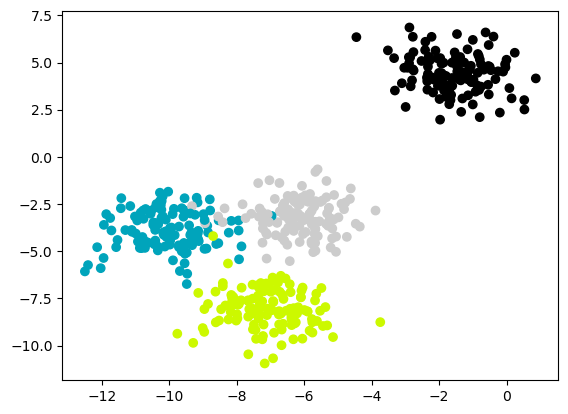

In [53]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='nipy_spectral')
plt.show()

Based on the scatter plot, there are four clusters, and they are somewhat far apart from each other, but three of them are closer and there is one more distant

**c. For both k-means and k-medoids (your implementations), calculate the silhouette plots and coefficients for each run, iterating K from 1 to 5 clusters.**

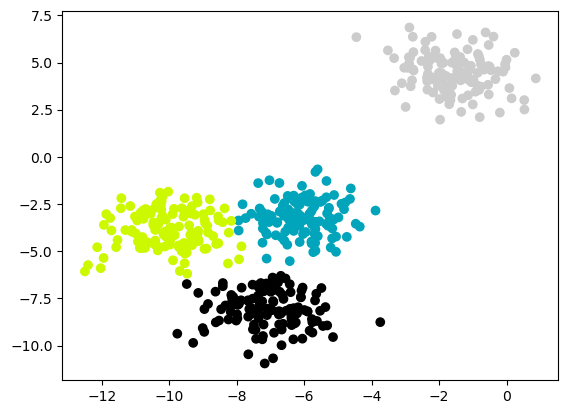

In [54]:
# Initialize KMeans
kmeans = MyKMeans(n_clusters=4)

# fit the data & predict cluster labels
kmeans.fit(X)
cluster_kmeans = kmeans.predict(X)
plt.scatter(X[:,0], X[:,1], c=cluster_kmeans, cmap='nipy_spectral')
plt.show()

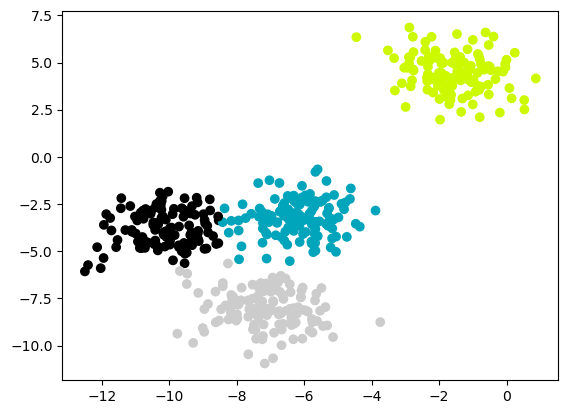

In [61]:
# Initialize KMeans
kmedoids = KMedoids(n_clusters=4)
# fit the data & predict cluster labels
kmedoids.fit(X)
cluster_kmedoids = kmedoids.predict(X)
plt.scatter(X[:,0], X[:,1], c=cluster_kmedoids, cmap='nipy_spectral')
plt.show()

**K-MEANS**

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.5745566973301872


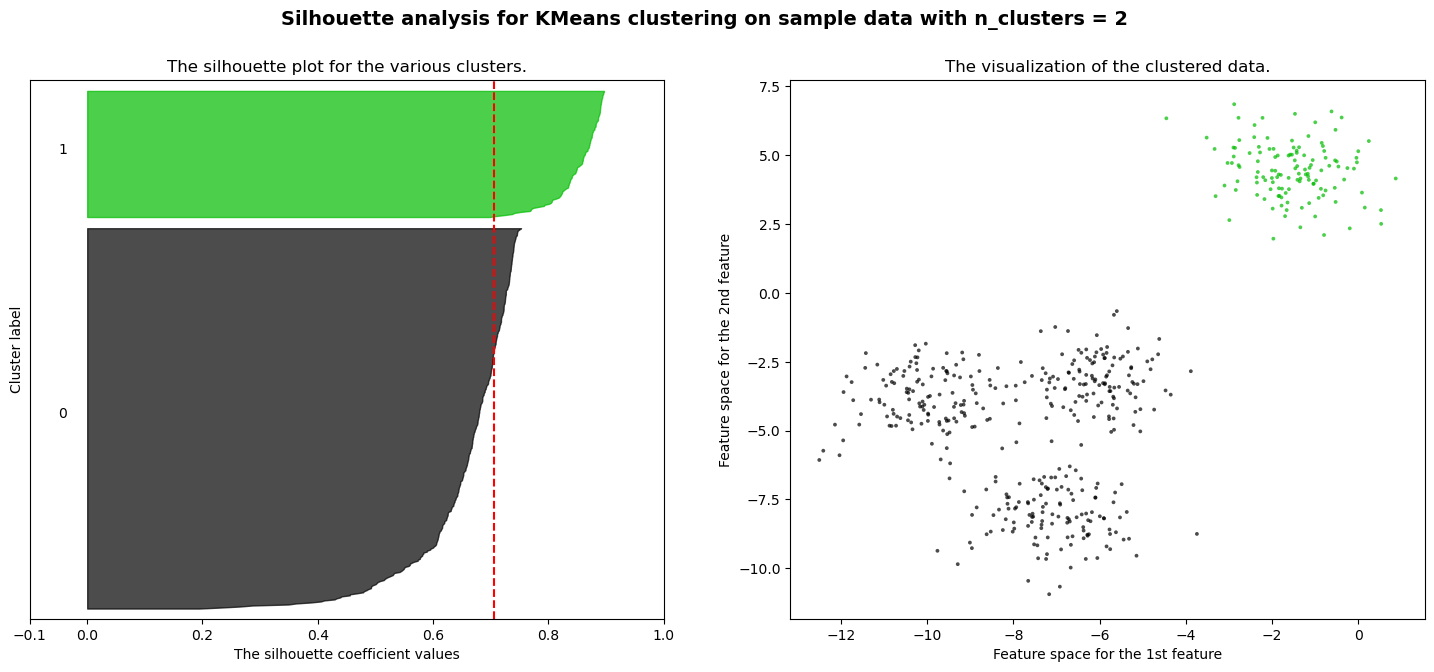

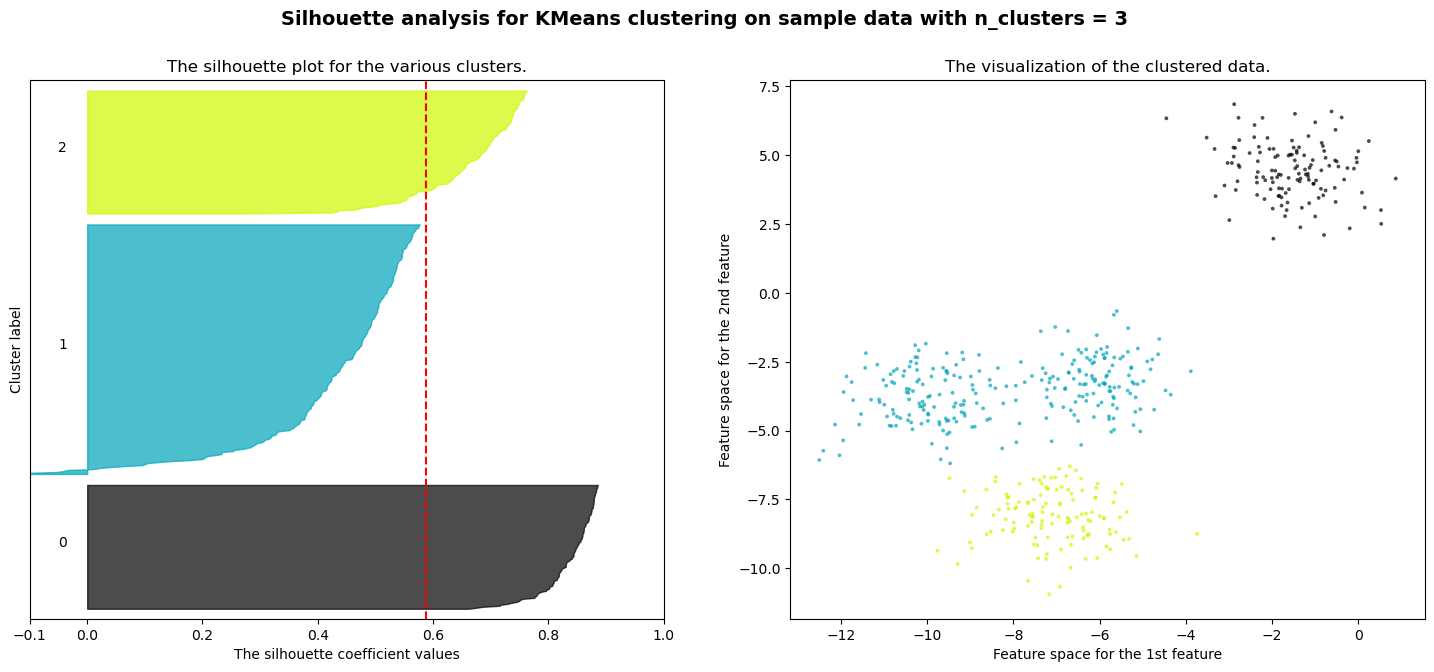

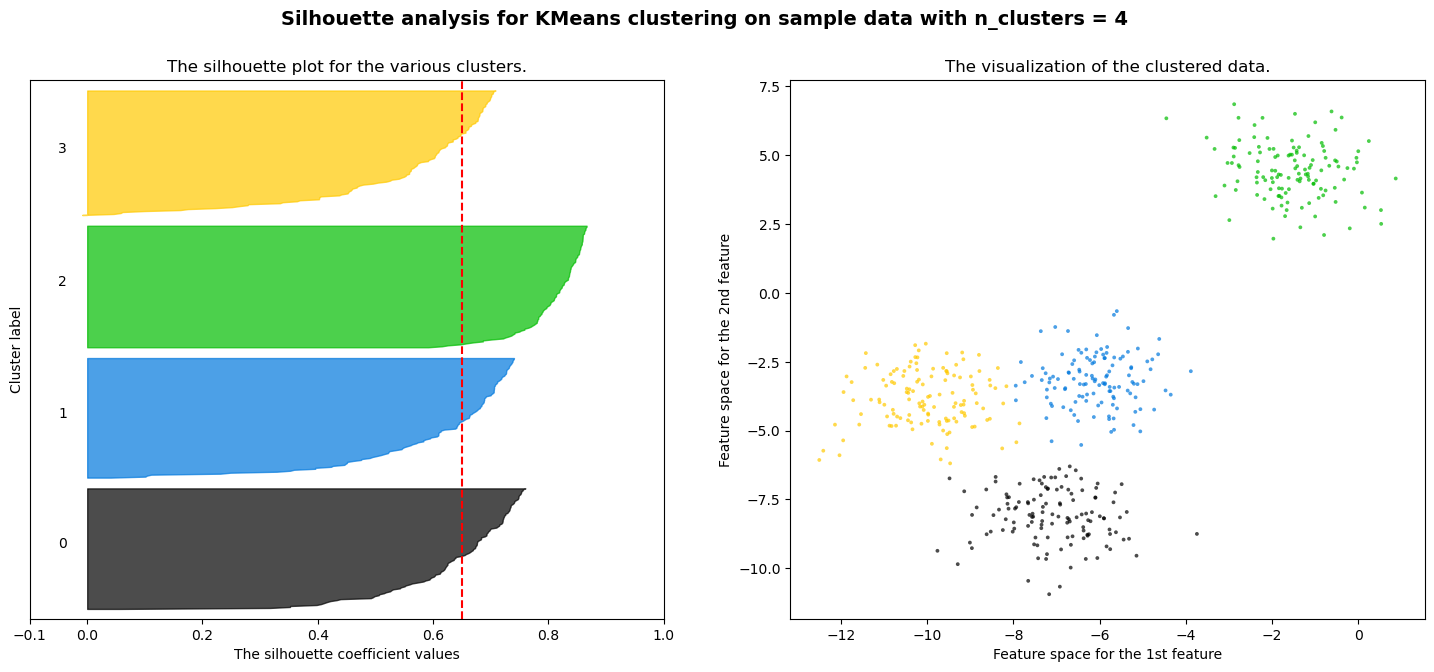

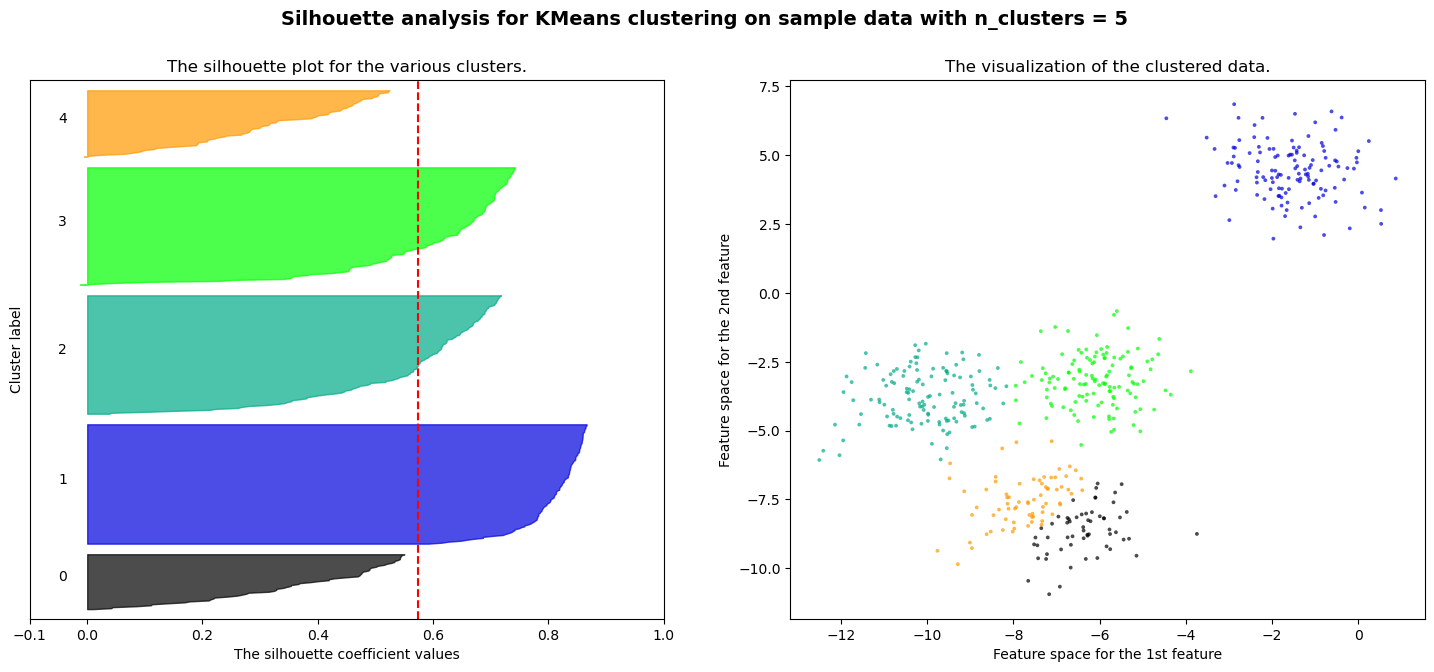

In [62]:
range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize KMeans
    kmeans = MyKMeans(n_clusters=n_clusters)
    # fit the data & predict cluster labels
    kmeans.fit(X)
    cluster_kmeans = kmeans.predict(X)

    silhouette_avg = silhouette_score(X, cluster_kmeans)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_kmeans)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_kmeans == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_kmeans.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

There is no point in calculating the silhouette coefficient with a single cluster K = 1 since the silhouette coefficient measures the similarity between points in different clusters.

With k = 2 got a silhouette score of 0.70 indicating that it is the best grouping performance, so for the exercise it is the optimal number of groupings, however, this can occur because there is a great separation of the data from the two clusters, due to the visual in my opinion with four clusters, achieving an average silhouette score of 65% shows well separated clusters with high silhouette scores for most of the data points, suggesting that the clustering performance is good.

**K-Medoids**

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.40274777844893095
For n_clusters = 4 The average silhouette_score is : 0.6403706944636783
For n_clusters = 5 The average silhouette_score is : 0.31029578069959607


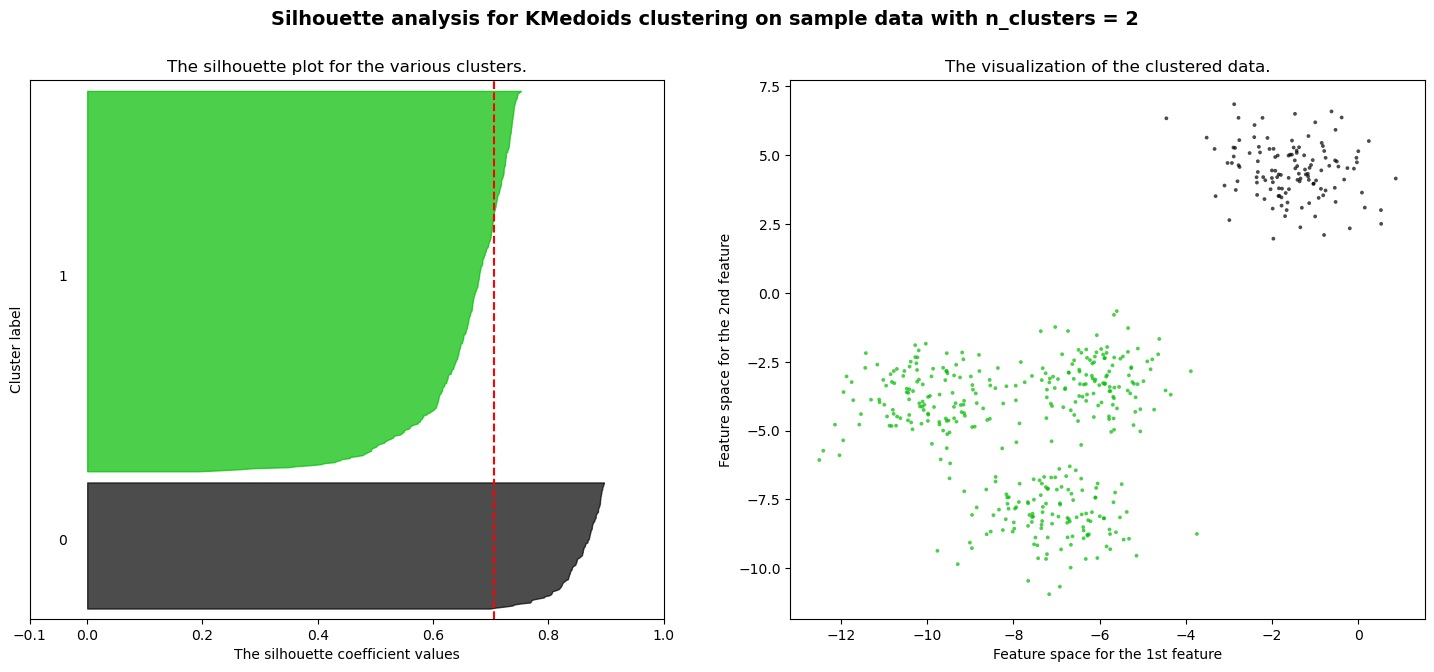

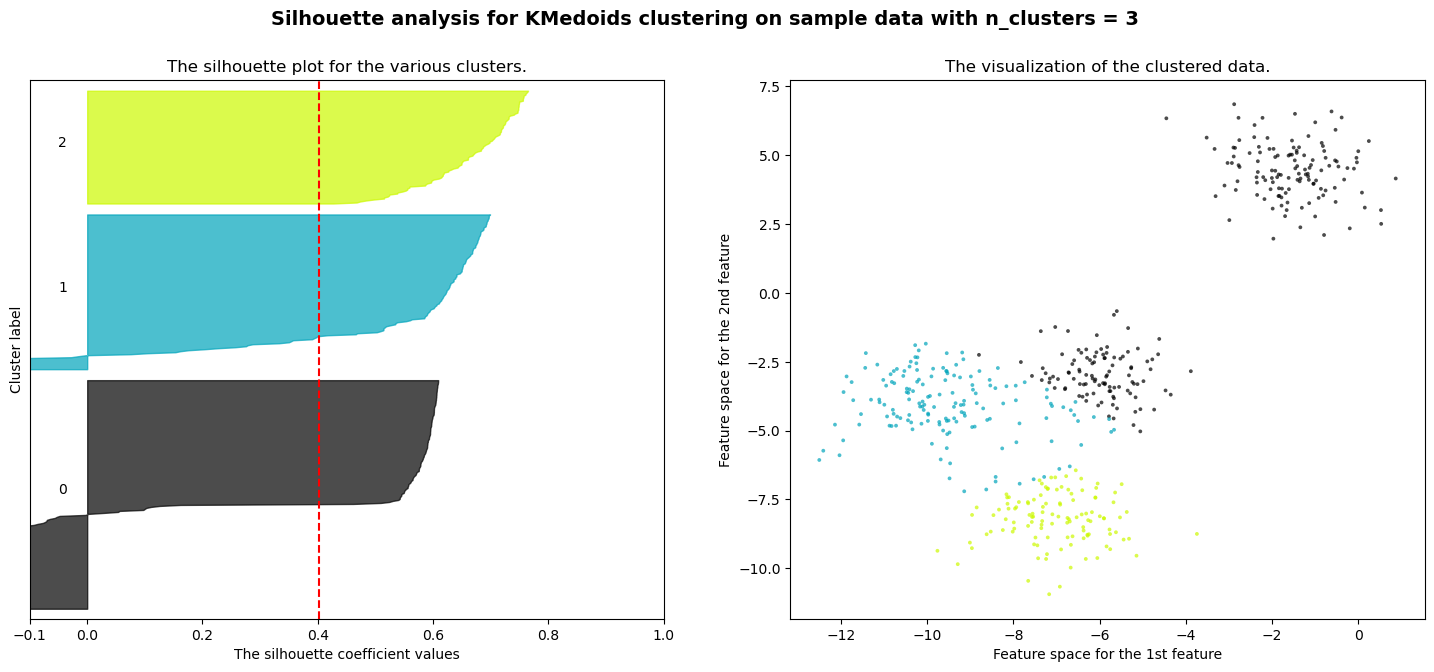

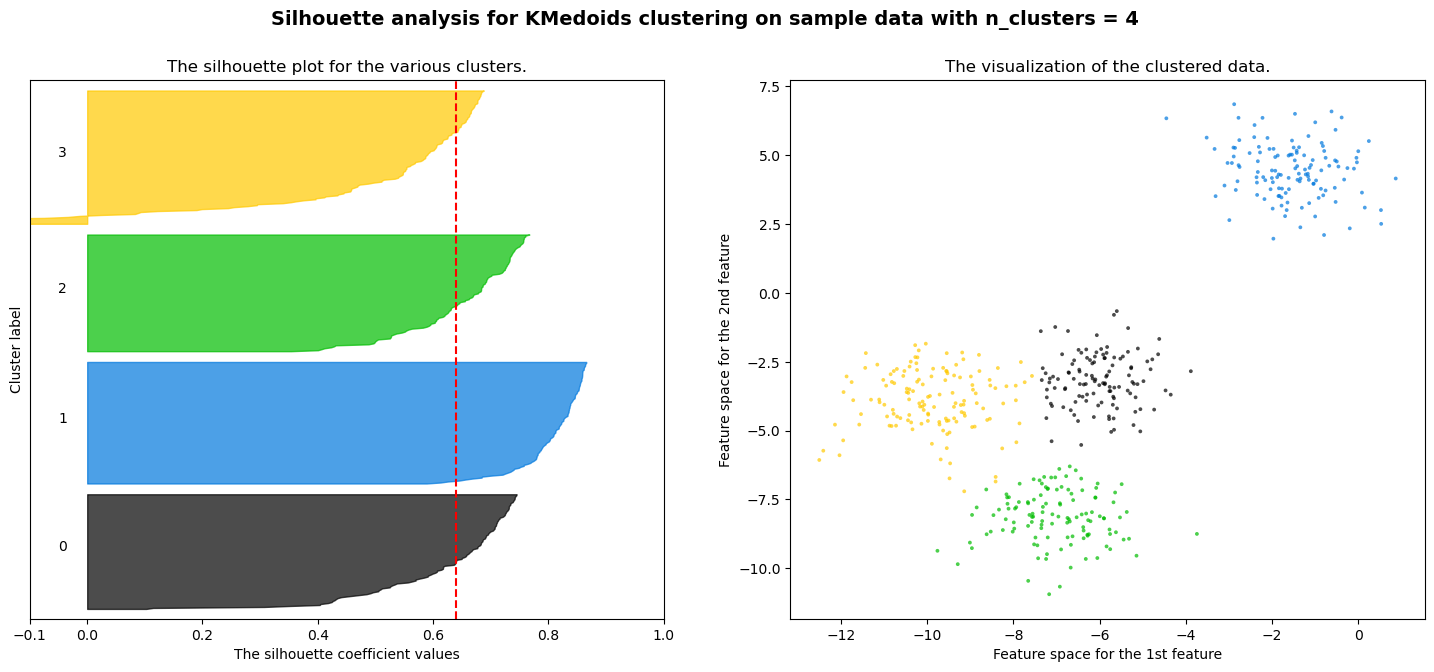

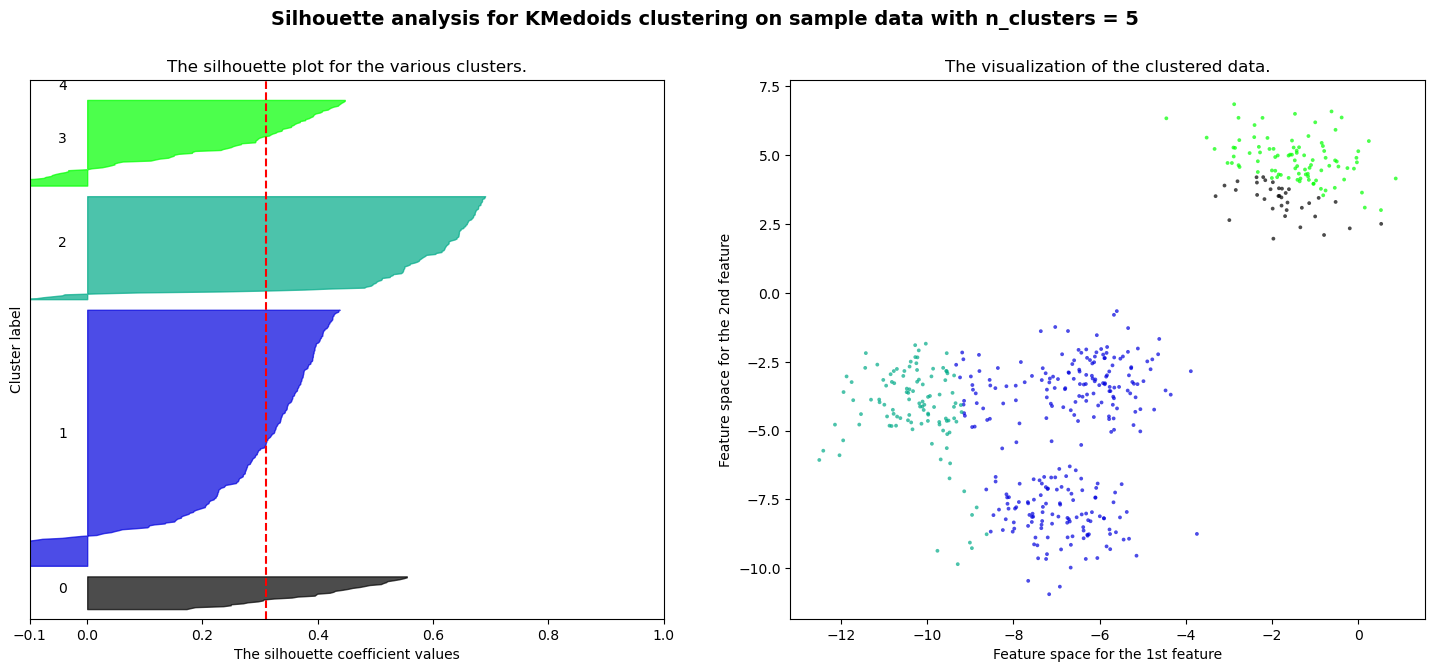

In [64]:
range_n_clusters = [2, 3, 4, 5]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    kmedoids = KMedoids(n_clusters=n_clusters)
    # fit the data & predict cluster labels
    kmedoids.fit(X)
    cluster_kmedoids = kmedoids.predict(X)

    silhouette_avg = silhouette_score(X, cluster_kmedoids)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
        # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_kmedoids)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_kmedoids == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_kmedoids.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMedoids clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

The silhouette plot shows that the n_clusters values of 3 and 5 are a poor choice for the given data due to the presence of clusters with below average silhouette scores and also due to large fluctuations in the size of the silhouette plots. the decision is between 2 and 4.
The silhouette plot for cluster "1", when n_clusters is equal to 2, is larger due to the grouping of the 3 subclusters into one large cluster. However, when n_clusters is equal to 4, all the parcels have a similar thickness and size and this can tell us that it might be a better choice of cluster.